In [56]:
%matplotlib
import plotly.plotly
import plotly.graph_objs as go
import math
import numpy as np
import plotly.plotly as py
py.sign_in('Jhillard', 'jTaxcdWM5zm8DNUR7WpE')
#plotly.offline.init_notebook_mode()

#Start with Thermal
#Shot
#Just the 4ktb.


Using matplotlib backend: Qt4Agg


In [95]:
class jet():
    def __init__(self):
            num_motors=3
            self.decel_height = 15
            
            self.firing = False;
            #http://www.thrustcurve.org/motorsearch.jsp?id=704
            self.total_impulse=474.9*num_motors
            self.burn_time=1.1
            self.start_time = -1
            self.total_weight = 0.575*num_motors
            self.prop_weight = 0.213*num_motors
            self.curr_weight = 0.575*num_motors
            
            
            #http://www.thrustcurve.org/motorsearch.jsp?id=201
            #Cesaroni I287
            self.total_impulse=486*num_motors
            self.burn_time=1.7
            self.start_time = -1
            self.total_weight = 0.605*num_motors
            self.prop_weight = 0.331*num_motors
            self.curr_weight = 0.605*num_motors
            
            #http://www.thrustcurve.org/motorsearch.jsp?id=1046
            #Cesaroni J94. I can't buy these yet
            self.total_impulse=644*num_motors
            self.burn_time=6.8
            self.start_time = -1
            self.total_weight = 0.660*num_motors
            self.prop_weight = 0.373*num_motors
            self.curr_weight = 0.660*num_motors
            
            #http://www.thrustcurve.org/motorsearch.jsp?id=598
            #KBA J520
            self.total_impulse=645.9*num_motors
            self.burn_time=1.2
            self.start_time = -1
            self.total_weight = 0.722*num_motors
            self.prop_weight = 0.327*num_motors
            self.curr_weight = 0.722*num_motors
            
            
    def step(self,curr_alt, curr_time):
        #print(self.firing)
        #print(curr_alt)
        #print(self.decel_height)
        if((not self.firing) and (curr_alt<self.decel_height)):
            self.firing = True
            self.start_time = curr_time
            print("Rocket Ignition is Good.")
        if((self.firing) and (self.start_time+self.burn_time>curr_time)):
            time_on = curr_time-self.start_time;
            thrust = self.total_impulse/self.burn_time
            self.curr_weight = self.total_weight-self.prop_weight+self.prop_weight*(self.burn_time-time_on)
        else:
            thrust=0;
            
        return (thrust, self.curr_weight)
    

In [100]:
import numpy as np
v_pred = 60 #m/s
height = 10E3 #m flight height
decel_height = 100 #height at rocket burn.
I= rocket()
payload_mass = 50 #kg
g = 9.8


#http://versadrones.com/products/heavy-lift-octocopter/
drone_mass = 4 #kg
drone_thrust = 120 #Newtons. ~12kg at a=9.8 This is an underestimate of max thrust by a lot, this is purely the payload value.
drone_thrust = 0


#http://www.lmnoeng.com/Force/DragForce.php
#Modelled as a square rectangle falling from the sky.
C = 1.05
p = 1.204
A = 1 #1 m**2

curr_alt = height

sample_size = 10000
time_span = 60*10
dt = time_span/sample_size

f_tot = [0]
mass_tot = [drone_mass+payload_mass]
v = [0]
alt = [height]

time = np.linspace(0,time_span,sample_size)
for t in  time:
    (f_rock, mass_rock) = I.step(alt[-1], t)
    mass_tot.append(payload_mass+drone_mass+mass_rock)
    curr_vel = v[-1]
    force_dt = -mass_tot[-1]*g +  0.5*(C*p*A)*curr_vel**2*np.sign(-curr_vel) + f_rock + drone_thrust
    f_tot.append(force_dt)
    a = f_tot[-1]/mass_tot[-1]
    
    #=
    ##print(a)
    #print(f_tot[-1])
    #print(curr_vel)
    #print(alt[-1])
    #print("========")
    #
    
    alt_temp = (alt[-1] + v[-1]*dt)
    if(alt_temp < 0):
        alt.append(0)
        v.append(0)
    else:
        v.append(v[-1] + a*dt)
        alt.append(alt_temp)
    
time = time = np.linspace(0,time_span,sample_size+1)
h_prime = np.array(alt)
f_prime = np.array(f_tot)
v_prime = np.array(v)
m_prime = np.array(mass_tot)
print("Simulation Complete")    

Rocket Ignition is Good.
Simulation Complete


In [101]:
data =[]
trace = go.Scatter(
    x = time,
    y = f_prime
)
data.append(trace)
trace = go.Scatter(
    x = time,
    y = h_prime
)
data.append(trace)
trace = go.Scatter(
    x = time,
    y = v_prime
)
data.append(trace)
trace = go.Scatter(
    x = time,
    y = m_prime
)
data.append(trace)






# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-line')


The draw time for this plot will be slow for clients without much RAM.


/home/jake/anaconda3/lib/python3.4/site-packages/plotly/plotly/plotly.py:1441: UserWarning:

Estimated Draw Time Slow



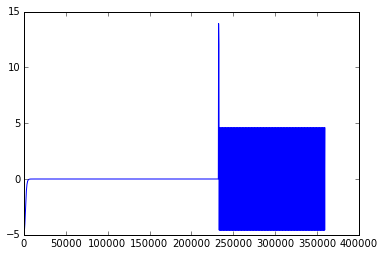

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
#plt.plot(time*time_span, h_prime)
#plt.plot(time*time_span, f_prime)
#plt.plot(time*time_span, v_prime)
#plt.plot((time*time_span)[1:-1], v_prime[1:-1]-v_prime[0:-2])
